In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [5]:
# load data set 
data = pd.read_csv('Mall_Customers.csv')
data =pd.DataFrame(data)
# change the coloum name to purchase
data.rename(columns={'Spending Score (1-100)':'Purchase',},inplace=True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Purchase
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# encode the categorical values
encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype =='category':
        data[col]= encoder.fit_transform(data[col])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Purchase
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:

# Select Features for Clustering (drop the 'Purchase' column if it's not used for features)
X = data.drop('Purchase', axis=1)


In [8]:
# Scale the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust n_clusters
kmeans.fit(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Purchase,Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


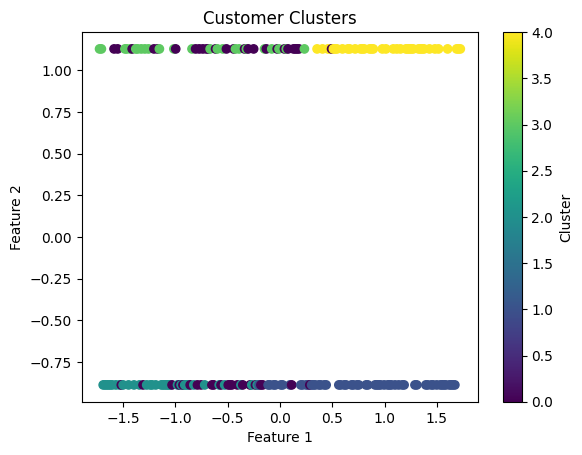

In [10]:
# Visualize the clustering (only works if there are 2 features, for 3D use a different approach)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Customer Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()


In [11]:
# Check the cluster centers (centroids)
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Evaluate using inertia (sum of squared distances to closest centroid)
print("Inertia:", kmeans.inertia_)


Cluster Centers:
 [[-0.53405567  0.20481334  1.32947793 -0.47066087]
 [ 0.80665089 -0.88640526 -0.20453507  0.74610328]
 [-1.1243188  -0.88640526 -0.62035971 -1.0755247 ]
 [-0.84582872  1.12815215 -0.94612419 -0.81180014]
 [ 1.02602503  1.12815215 -0.22530963  0.97002582]]
Inertia: 241.69184828990433
